In [2]:
import sys
plist = ['/Applications/NEURON/lib/python']
for pd in plist:
    if pd in sys.path:
        sys.path.remove(pd)

In [3]:
# Simple Reaction with Abrupt Change in Reaction Rate

from neuron import h,rxd 

def advance_a_bit():
    for i in range(5):
        h.fadvance()
        print(data.format(t=h.t, cl=cl.nodes[0].concentration,
                          ca=ca.nodes[0].concentration,
                          cacl2=cacl2.nodes[0].concentration))

dend = h.Section(name='dend')
cyt = rxd.Region(h.allsec(), nrn_region='i')

cl = rxd.Species(cyt, initial=1, name='cl', charge = -1)
ca = rxd.Species(cyt, initial=1, name='ca', charge = 2)
cacl2 = rxd.Species(cyt, initial=0, name='cacl2')

reaction = rxd.Reaction(2 * cl + ca, cacl2, 1)

h.finitialize(-65)

heading = '{t:>10s}  {cl:>10s}  {ca:>10s}  {cacl2:>10s}'
data = '{t:10g}  {cl:10g}  {ca:10g}  {cacl2:10g}'

advance_a_bit()

reaction.f_rate *- 5

print('==========')

advance_a_bit()


     0.025    0.955556    0.977778   0.0222222
      0.05    0.915565    0.957783   0.0422175
     0.075    0.879356    0.939678   0.0603222
       0.1    0.846386    0.923193   0.0768069
     0.125    0.816217    0.908108   0.0918917
      0.15    0.788484    0.894242    0.105758
     0.175    0.762889    0.881445    0.118555
       0.2    0.739178    0.869589    0.130411
     0.225     0.71714     0.85857     0.14143
      0.25    0.696591    0.848296    0.151704


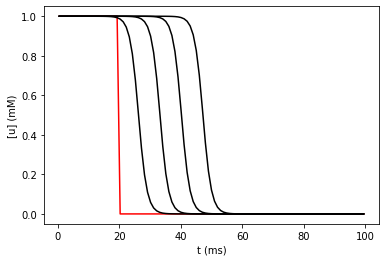

In [5]:
# Scalar Bistable Wave

from neuron import h, rxd
import numpy as np
import matplotlib.pyplot as plt

def my_initial(node):
    return 1 if node.x < 0.2 else 0

def plot_it(color='k'):
    y = u.nodes.concentration
    x = u.nodes.x
    x = dend.L * np.array(x)
    plt.plot(x, y, color)

h.load_file('stdrun.hoc')
dend = h.Section(name='dend')
dend.nseg = 101

where = rxd.Region([dend])
u = rxd.Species(where, d=1, initial=my_initial)
bistable_reaction = rxd.Rate(u, -u * (1-u) * (0.3-u))

h.finitialize(-65)

plot_it('r')

for i in range(1, 5):
    h.continuerun(i * 25)
    plot_it()

plt.xlabel('t (ms)')
plt.ylabel('[u] (mM)')
plt.show()


